# Time Series Forecasting with ARIMA
This notebook demonstrates time series forecasting using Yahoo Finance data for Apple Inc. (AAPL) stock prices. We will use the ARIMA model to forecast future prices, plot predictions vs. real values, and evaluate the model's performance.

Standard ARIMA: Fit once, predict all future points without updating.

In [1]:
# Install required packages if not already installed
!pip install yfinance statsmodels matplotlib scikit-learn --quiet


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## 1. Load AAPL Stock Data from Yahoo Finance

/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_28805/397873123.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


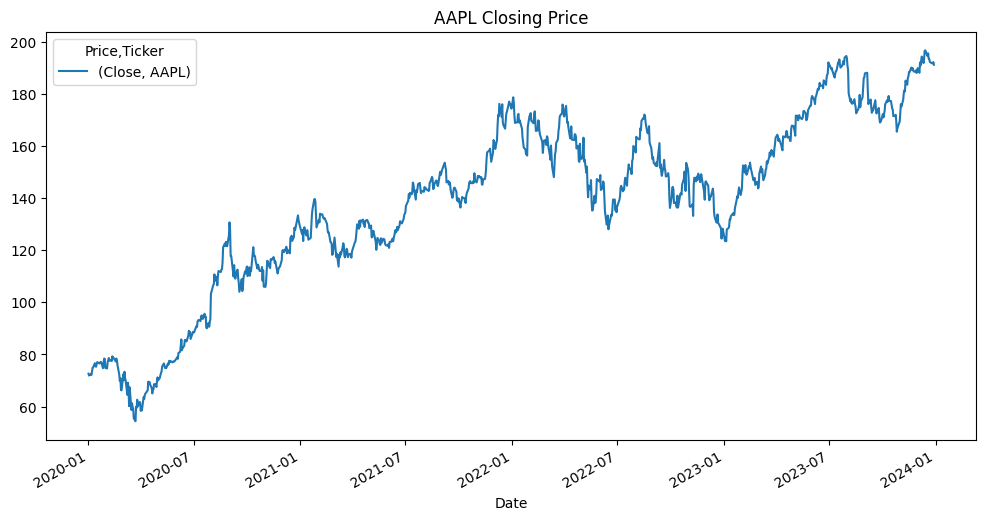

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for AAPL
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
data = data[['Close']]
data.dropna(inplace=True)
data.plot(figsize=(12,6), title='AAPL Closing Price')
plt.show()

## 2. Prepare Data for ARIMA Forecasting

In [3]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
print(f'Train size: {len(train)}, Test size: {len(test)}')

Train size: 804, Test size: 202


## 3. Fit ARIMA Model and Forecast

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (order can be tuned)
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Combine predictions with test set
test['Predicted'] = forecast.values

/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

## 4. Plot Prediction vs. Real Values

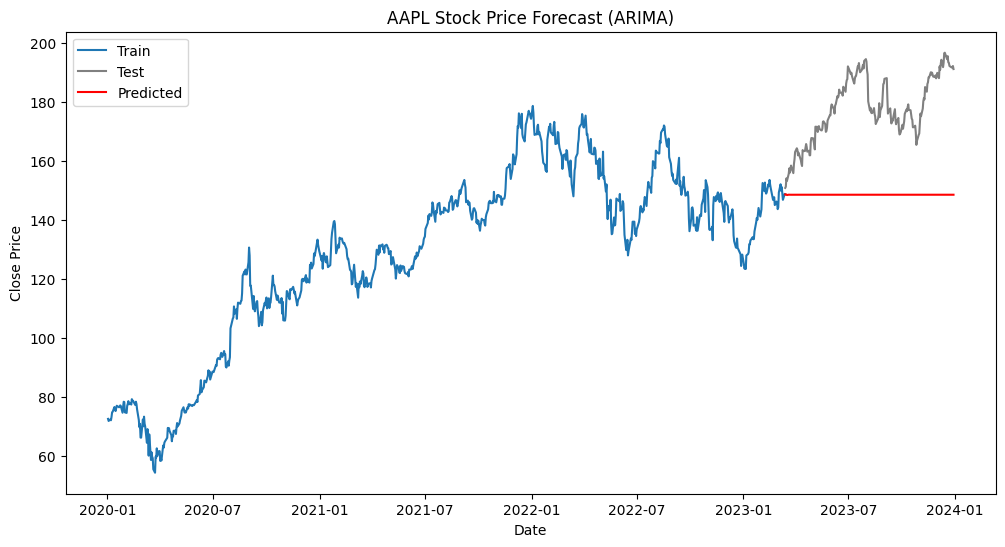

In [5]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test', color='gray')
plt.plot(test.index, test['Predicted'], label='Predicted', color='red')
plt.title('AAPL Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 5. Evaluation Metrics: MAE and RMSE

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['Close'], test['Predicted'])
rmse = np.sqrt(mean_squared_error(test['Close'], test['Predicted']))
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 29.00
Root Mean Squared Error (RMSE): 31.02
